## Import packages

In [149]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

## Utils

In [150]:
def plot_image(
    image: np.ndarray,
    y_true: np.ndarray,
    y_pred: np.ndarray = None,
    shape: tuple[int, int] = (2, 4),  # rows, cols
) -> None:
    random_index = np.random.randint(0, image.shape[0], shape[0] * shape[1])
    _, axes = plt.subplots(shape[0], shape[1], figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        color = "green" if y_true[random_index[i]] == y_pred[random_index[i]] else "red"
        ax.imshow(image[random_index[i]], cmap="gray")
        ax.axis("off")
        ax.set_title(f"True: {y_true[random_index[i]]}", color=color)
        if y_pred is not None:
            ax.set_title(
                f"True: {y_true[random_index[i]]}, Pred: {y_pred[random_index[i]]}"
            )

    plt.tight_layout()
    plt.show()

## Import dataset

In [151]:
mnist = keras.datasets.mnist.load_data()

In [152]:
(X_train, y_train), (X_test, y_test) = mnist

### Normalize data

In [153]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## Train model

In [154]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [155]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [156]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 542us/step - accuracy: 0.8600 - loss: 0.4821
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.9544 - loss: 0.1534
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.9677 - loss: 0.1094
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.9728 - loss: 0.0892
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.9764 - loss: 0.0764


In [158]:
predictions = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step


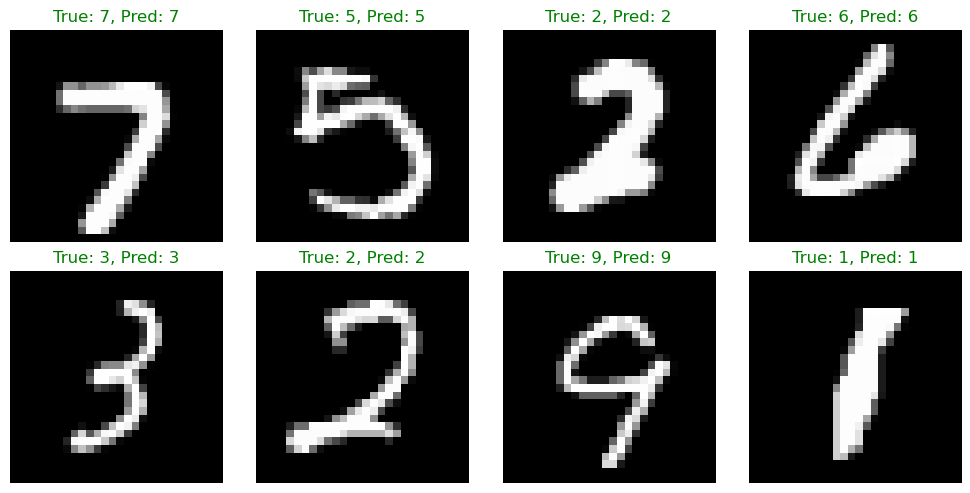

In [159]:
plot_image(X_test, y_test, predictions)

In [160]:
model.save("mnist_model.keras")